# **KNN(k-Nearest Neighbors)**

**Importer les bibliothéques necessaires**

In [71]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib as plt

from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

**Importer les fichiers de test et d'apprentissage**

In [72]:
# Chargement des données d'entraînement et de test
trainDat = pd.read_csv("traindat.txt", delim_whitespace=True)
testDat = pd.read_csv("Testdat.txt", delim_whitespace=True)



<ipython-input-72-f60faa25bc04>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  trainDat = pd.read_csv("traindat.txt", delim_whitespace=True)
<ipython-input-72-f60faa25bc04>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  testDat = pd.read_csv("Testdat.txt", delim_whitespace=True)


**Fusionner les deux ensembles de données**

In [73]:
# Fusionner les deux ensembles de données
data = pd.concat([trainDat, testDat], axis=0).reset_index(drop=True)

# Afficher un aperçu des données fusionnées
#print(data.head())
#print(data.shape)

# Séparer les caractéristiques (X) et la variable cible (y)
X = data.drop(['y'], axis=1)
y = data['y']

print(X.head())
print(X.shape)
print(y.head())
print(y.shape)



     m00         mu02        mu11         mu20        mu03         mu12  \
0  119.0  1164.571429  -84.000000  2274.705882 -728.448980 -1026.235294   
1  124.0  1205.870968  -30.129032  2439.120968 -703.298647 -1067.540583   
2  123.0  1167.365854  -47.073171  2372.747967 -531.112433 -1078.021416   
3  131.0  1288.229008  -13.320611  2523.648855 -480.553814 -1266.542218   
4  133.0  1385.879699 -148.030075  2644.992481 -613.045395 -1565.516988   

         mu21         mu30  
0 -308.016807  2446.878893  
1 -395.008325  2494.423127  
2 -452.984335  2438.033181  
3 -219.485170  2209.729619  
4 -251.322856  2869.338459  
(200, 8)
0    a
1    a
2    a
3    a
4    a
Name: y, dtype: object
(200,)


**Definitions des fonctions de KNN**

In [74]:
def get_voisinnage_class(vectTest, X_train, y_train, k):
    # Calculer les distances euclidiennes entre vectTest et chaque point de X_train
    distances = np.linalg.norm(X_train - vectTest, axis=1)

    # Obtenir les indices des k plus proches voisins
    nearest_neighbor_ids = distances.argsort()[:k]

    # Retourner les classes des k voisins les plus proches
    nearest_neighbor_class = y_train.iloc[nearest_neighbor_ids]
    return nearest_neighbor_class

In [75]:
def get_Class_plus_proche(vectTest, X_train, y_train, k):
    k_class_dist_voisin = get_voisinnage_class(vectTest, X_train, y_train, k)
    # Retourner la classe la plus fréquente parmi les voisins
    return k_class_dist_voisin.value_counts().index[0]

In [76]:
def get_y_predict(X_test, X_train, y_train, y_test, k):
    y_predict = y_test.copy()
    for index, row in X_test.iterrows():
        class_predict = get_Class_plus_proche(row, X_train, y_train, k)
        y_predict.iloc[index] = class_predict
    return y_predict

In [77]:
def get_Taux_Erreur(X_test, X_train, y_train, y_test, y_pred):

    matConf = confusion_matrix(y_test, y_pred)

    # Calcul du taux d'erreur
    taux_Erreur = (np.sum(matConf) - np.diagonal(matConf).sum()) / np.sum(matConf)
    return taux_Erreur

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

def afficher_courbe(X_test, X_train, y_train, y_test):
    results = []  # Liste pour stocker les résultats

    # Tester les valeurs impaires de k (1, 3, 5,... jusqu'à 19)
    for i in range(1, 20, 2):
        y_pred = get_y_predict(X_test, X_train, y_train, y_test, i)
        taux_Erreur = get_Taux_Erreur(X_test, X_train, y_train, y_test,y_pred )
        results.append({"k": i, "taux_erreur": taux_Erreur})  # Ajouter dans la liste

    # Convertir la liste en DataFrame
    df = pd.DataFrame(results)

    # Tracer la courbe
    plt.figure(figsize=(8,5))
    plt.plot(df["k"], df["taux_erreur"], marker='o', linestyle='dashed', color='red')
    plt.xlabel("k (nombre de voisins)")
    plt.ylabel("Taux d'erreur")
    plt.title("Courbe du taux d'erreur en fonction de k")
    plt.show()


**KNN avec validation croisée**

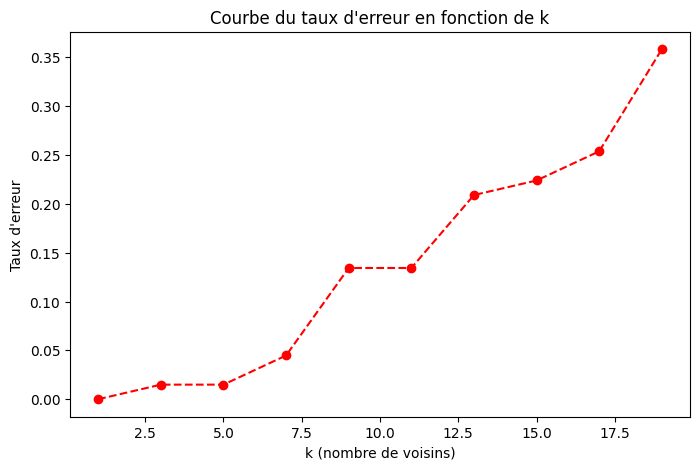

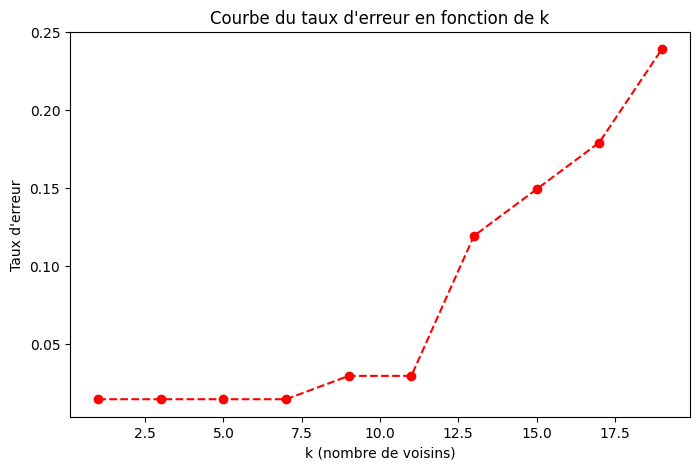

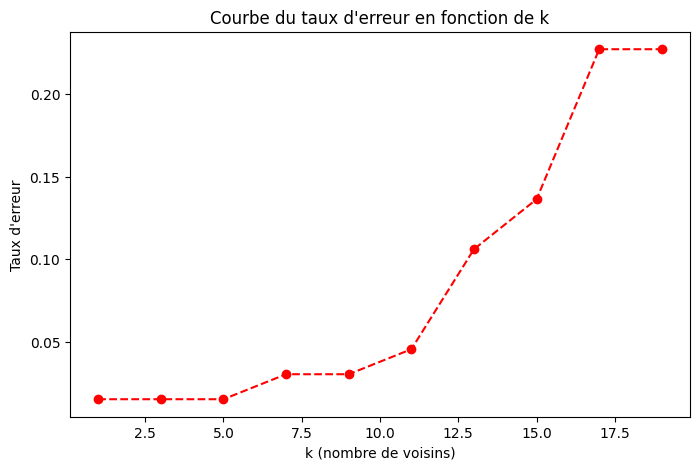

In [79]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
# Utilisation de KFold avec 3 sous-ensembles
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    # Séparation des données en ensembles d'entraînement et de validation
    X_train = X.iloc[train_index].reset_index(drop=True)
    y_train = y.iloc[train_index].reset_index(drop=True)

    X_test = X.iloc[test_index].reset_index(drop=True)
    y_test = y.iloc[test_index].reset_index(drop=True)

    # Affichage de la courbe du taux d'erreur pour chaque fold
    afficher_courbe(X_test, X_train, y_train, y_test)

Le choix optimal de k est celui qui minimise l'erreur tout en évitant l'overfitting (trop petite valeur de k) et l'underfitting (trop grande valeur de k).
Dans ces courbes, k=5 ou 𝑘=7 semblent être de bons choix, car ils maintiennent un faible taux d'erreur avant que celui-ci ne commence à augmenter progressivement.

# **SVM(Machine à vecteurs de support)**

**Linéaire**

In [80]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn.preprocessing import LabelEncoder
classEncoder = LabelEncoder()
y_train_dat = classEncoder.fit_transform(y_train)
y_test_dat = classEncoder.fit_transform(y_test)

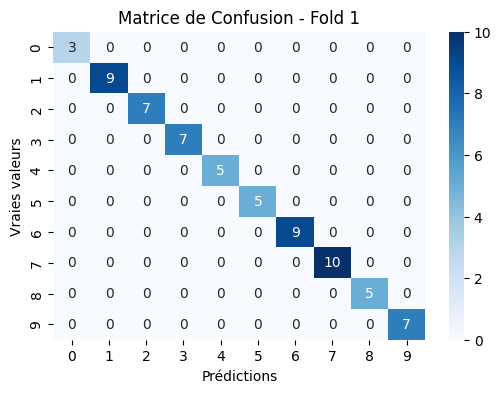

Rapport de classification pour le fold 1 :
               precision    recall  f1-score   support

           a       1.00      1.00      1.00         3
           c       1.00      1.00      1.00         9
           e       1.00      1.00      1.00         7
           m       1.00      1.00      1.00         7
           n       1.00      1.00      1.00         5
           o       1.00      1.00      1.00         5
           r       1.00      1.00      1.00         9
           s       1.00      1.00      1.00        10
           x       1.00      1.00      1.00         5
           z       1.00      1.00      1.00         7

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



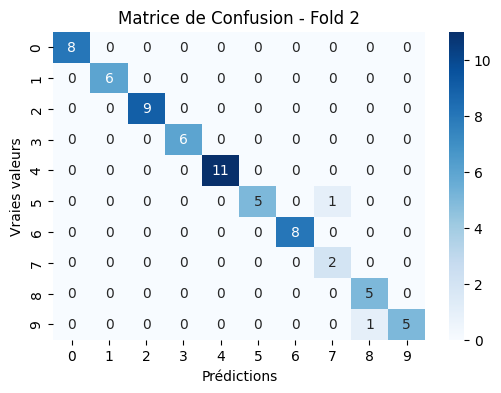

Rapport de classification pour le fold 2 :
               precision    recall  f1-score   support

           a       1.00      1.00      1.00         8
           c       1.00      1.00      1.00         6
           e       1.00      1.00      1.00         9
           m       1.00      1.00      1.00         6
           n       1.00      1.00      1.00        11
           o       1.00      0.83      0.91         6
           r       1.00      1.00      1.00         8
           s       0.67      1.00      0.80         2
           x       0.83      1.00      0.91         5
           z       1.00      0.83      0.91         6

    accuracy                           0.97        67
   macro avg       0.95      0.97      0.95        67
weighted avg       0.98      0.97      0.97        67



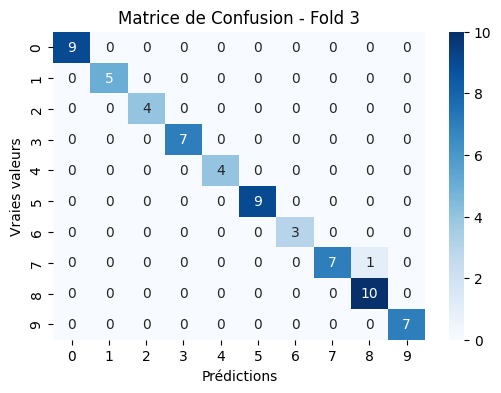

Rapport de classification pour le fold 3 :
               precision    recall  f1-score   support

           a       1.00      1.00      1.00         9
           c       1.00      1.00      1.00         5
           e       1.00      1.00      1.00         4
           m       1.00      1.00      1.00         7
           n       1.00      1.00      1.00         4
           o       1.00      1.00      1.00         9
           r       1.00      1.00      1.00         3
           s       1.00      0.88      0.93         8
           x       0.91      1.00      0.95        10
           z       1.00      1.00      1.00         7

    accuracy                           0.98        66
   macro avg       0.99      0.99      0.99        66
weighted avg       0.99      0.98      0.98        66



In [82]:
# Définir le modèle SVM avec un noyau linéaire
model1 = SVC(kernel='linear', probability=True)

# Utiliser KFold avec 3 sous-ensembles
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialiser des listes pour stocker les scores
confusion_matrices = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    # Séparer les données en ensembles d'entraînement et de validation
    X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

    # Entraîner le modèle
    model1.fit(X_train, y_train)

    # Prédictions
    y_pred = model1.predict(X_test)
    y_scores = model1.decision_function(X_test)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Afficher la matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f'Matrice de Confusion - Fold {fold}')
    plt.show()

        # Afficher le rapport de classification
    print(f"Rapport de classification pour le fold {fold} :\n", classification_report(y_test, y_pred))


**Polynomial**

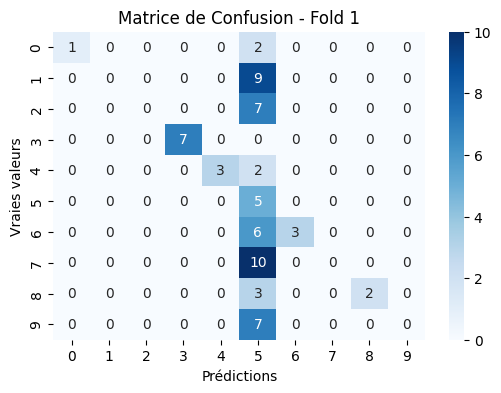

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Rapport de classification pour le fold 1 :
               precision    recall  f1-score   support

           a       1.00      0.33      0.50         3
           c       0.00      0.00      0.00         9
           e       0.00      0.00      0.00         7
           m       1.00      1.00      1.00         7
           n       1.00      0.60      0.75         5
           o       0.10      1.00      0.18         5
           r       1.00      0.33      0.50         9
           s       0.00      0.00      0.00        10
           x       1.00      0.40      0.57         5
           z       0.00      0.00      0.00         7

    accuracy                           0.31        67
   macro avg       0.51      0.37      0.35        67
weighted avg       0.44      0.31      0.31        67



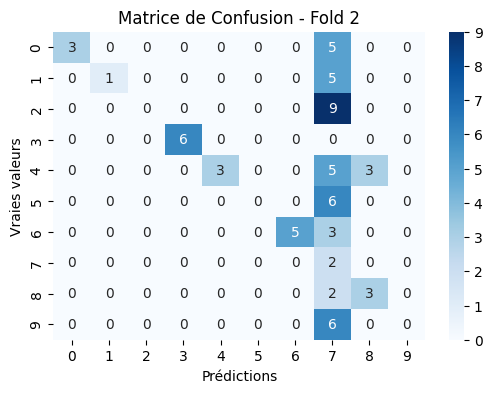

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Rapport de classification pour le fold 2 :
               precision    recall  f1-score   support

           a       1.00      0.38      0.55         8
           c       1.00      0.17      0.29         6
           e       0.00      0.00      0.00         9
           m       1.00      1.00      1.00         6
           n       1.00      0.27      0.43        11
           o       0.00      0.00      0.00         6
           r       1.00      0.62      0.77         8
           s       0.05      1.00      0.09         2
           x       0.50      0.60      0.55         5
           z       0.00      0.00      0.00         6

    accuracy                           0.34        67
   macro avg       0.55      0.40      0.37        67
weighted avg       0.62      0.34      0.39        67



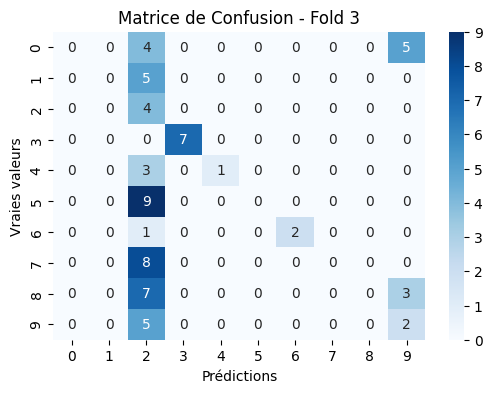

Rapport de classification pour le fold 3 :
               precision    recall  f1-score   support

           a       0.00      0.00      0.00         9
           c       0.00      0.00      0.00         5
           e       0.09      1.00      0.16         4
           m       1.00      1.00      1.00         7
           n       1.00      0.25      0.40         4
           o       0.00      0.00      0.00         9
           r       1.00      0.67      0.80         3
           s       0.00      0.00      0.00         8
           x       0.00      0.00      0.00        10
           z       0.20      0.29      0.24         7

    accuracy                           0.24        66
   macro avg       0.33      0.32      0.26        66
weighted avg       0.24      0.24      0.20        66



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# Définir le modèle SVM avec un noyau polynomial
model2 = SVC(kernel='poly', probability=True)

# Utiliser KFold avec 3 sous-ensembles
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialiser des listes pour stocker les scores
confusion_matrices = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    # Séparer les données en ensembles d'entraînement et de validation
    X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

    # Entraîner le modèle
    model2.fit(X_train, y_train)

    # Prédictions
    y_pred = model2.predict(X_test)
    y_scores = model2.decision_function(X_test)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Afficher la matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f'Matrice de Confusion - Fold {fold}')
    plt.show()
        # Afficher le rapport de classification
    print(f"Rapport de classification pour le fold {fold} :\n", classification_report(y_test, y_pred))



**RBF(Radial Basis Function)**

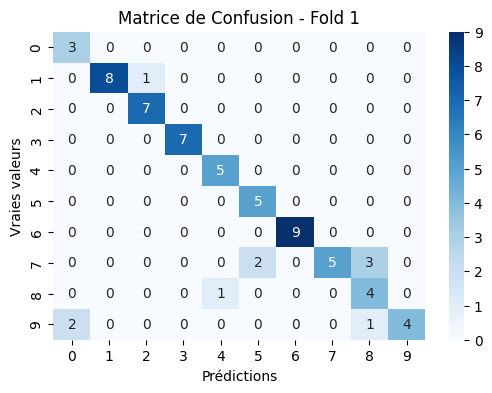

Rapport de classification pour le fold 1 :
               precision    recall  f1-score   support

           a       0.60      1.00      0.75         3
           c       1.00      0.89      0.94         9
           e       0.88      1.00      0.93         7
           m       1.00      1.00      1.00         7
           n       0.83      1.00      0.91         5
           o       0.71      1.00      0.83         5
           r       1.00      1.00      1.00         9
           s       1.00      0.50      0.67        10
           x       0.50      0.80      0.62         5
           z       1.00      0.57      0.73         7

    accuracy                           0.85        67
   macro avg       0.85      0.88      0.84        67
weighted avg       0.90      0.85      0.85        67



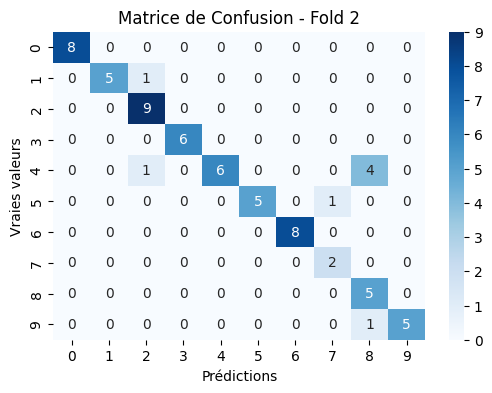

Rapport de classification pour le fold 2 :
               precision    recall  f1-score   support

           a       1.00      1.00      1.00         8
           c       1.00      0.83      0.91         6
           e       0.82      1.00      0.90         9
           m       1.00      1.00      1.00         6
           n       1.00      0.55      0.71        11
           o       1.00      0.83      0.91         6
           r       1.00      1.00      1.00         8
           s       0.67      1.00      0.80         2
           x       0.50      1.00      0.67         5
           z       1.00      0.83      0.91         6

    accuracy                           0.88        67
   macro avg       0.90      0.90      0.88        67
weighted avg       0.93      0.88      0.88        67



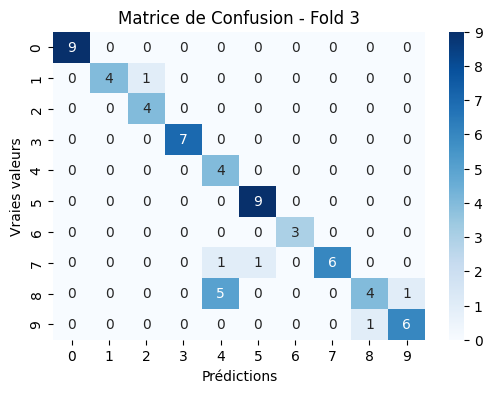

Rapport de classification pour le fold 3 :
               precision    recall  f1-score   support

           a       1.00      1.00      1.00         9
           c       1.00      0.80      0.89         5
           e       0.80      1.00      0.89         4
           m       1.00      1.00      1.00         7
           n       0.40      1.00      0.57         4
           o       0.90      1.00      0.95         9
           r       1.00      1.00      1.00         3
           s       1.00      0.75      0.86         8
           x       0.80      0.40      0.53        10
           z       0.86      0.86      0.86         7

    accuracy                           0.85        66
   macro avg       0.88      0.88      0.85        66
weighted avg       0.89      0.85      0.85        66



In [84]:
# Définir le modèle SVM avec un noyau RDF
model3 = SVC(kernel='rbf', probability=True)

# Utiliser KFold avec 3 sous-ensembles
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialiser des listes pour stocker les scores
confusion_matrices = []
roc_aucs = []

for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    # Séparer les données en ensembles d'entraînement et de validation
    X_train, X_test = X.iloc[train_index].reset_index(drop=True), X.iloc[test_index].reset_index(drop=True)
    y_train, y_test = y.iloc[train_index].reset_index(drop=True), y.iloc[test_index].reset_index(drop=True)

    # Entraîner le modèle
    model3.fit(X_train, y_train)

    # Prédictions
    y_pred = model3.predict(X_test)
    y_scores = model3.decision_function(X_test)

    # Calculer la matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

    # Afficher la matrice de confusion
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title(f'Matrice de Confusion - Fold {fold}')
    plt.show()
        # Afficher le rapport de classification
    print(f"Rapport de classification pour le fold {fold} :\n", classification_report(y_test, y_pred))



Le Modèle le plus performant est le modèle linéaire car il a donné des précisions et des F1-scores plus élevés que les autres modèles.